<a href="https://colab.research.google.com/github/dhanrajadith/Advanced-React/blob/master/cifar_10_woking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras


In [ ]:

from keras.datasets import cifar10
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
print("Shape of X_train: %r ", X_train.shape)
print("Shape of Y_train: %r ", Y_train.shape)
print("Shape of X_test: %r ",  X_test.shape)
print("Shape of Y_test: %r ",  Y_test.shape)

Shape of X_train: %r  (50000, 32, 32, 3)
Shape of Y_train: %r  (50000, 1)
Shape of X_test: %r  (10000, 32, 32, 3)
Shape of Y_test: %r  (10000, 1)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:

from pylab import rcParams
rcParams['figure.figsize']=(16,4)

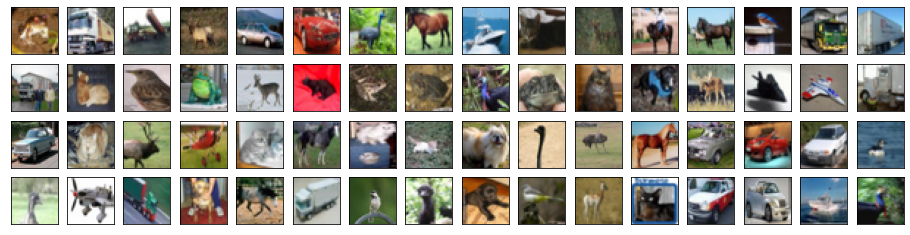

In [ ]:
for i in range(64):
    plt.subplot(4,16,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
plt.show()

In [ ]:

BATCH_SIZE = 32
NB_CLASSES = 10
NB_EPOCH = 25

In [ ]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_train = X_train/255
X_test  /= 255

In [ ]:
from keras.utils import np_utils
Y_train_onehot = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test_onehot  = np_utils.to_categorical(Y_test, NB_CLASSES)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(horizontal_flip=True)

datagen.fit(X_train)

In [146]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [147]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [148]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [149]:
label = ['Airplane', 'Automobile', 'Bird', 'Cat',
                  'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

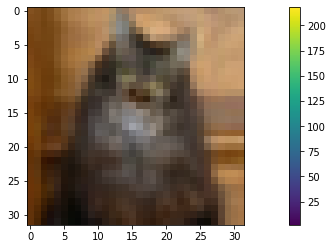

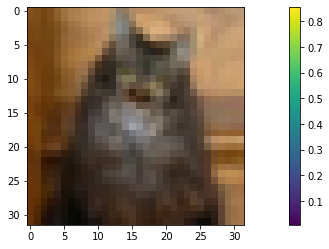

In [150]:
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

#rescaling it between 0 to 1
X_train = X_train/255.0
X_test = X_test/255.0


#again plot
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

In [151]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Conv2D
from tensorflow.keras.layers import MaxPool2D, Activation, MaxPooling2D

In [152]:
model = Sequential()
model.add(Conv2D(64,activation = 'relu',kernel_size = (3,3 )))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(BatchNormalization())
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [153]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [154]:
history = model.fit(X_train, y_train, epochs=10, verbose=1, 
                  validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 72s 65ms/step - loss: 1.4795 - accuracy: 0.5011 - val_loss: 2.0077 - val_accuracy: 0.3538
Epoch 2/10
1094/1094 [==============================] - 71s 65ms/step - loss: 0.9921 - accuracy: 0.6515 - val_loss: 1.6734 - val_accuracy: 0.4663
Epoch 3/10
1094/1094 [==============================] - 71s 65ms/step - loss: 0.7852 - accuracy: 0.7216 - val_loss: 1.1040 - val_accuracy: 0.6321
Epoch 4/10
1094/1094 [==============================] - 71s 65ms/step - loss: 0.6158 - accuracy: 0.7819 - val_loss: 1.2634 - val_accuracy: 0.5990
Epoch 5/10
1094/1094 [==============================] - 72s 66ms/step - loss: 0.4566 - accuracy: 0.8412 - val_loss: 1.3707 - val_accuracy: 0.6267
Epoch 6/10
1094/1094 [==============================] - 71s 65ms/step - loss: 0.3401 - accuracy: 0.8822 - val_loss: 1.3465 - val_accuracy: 0.6456
Epoch 7/10
1094/1094 [==============================] - 71s 64ms/step - loss: 0.2501 - accuracy: 0.9120 - val_loss: 1.9727 -

In [155]:
history.history['loss']

[1.4794811010360718,
 0.9921455383300781,
 0.7852457165718079,
 0.6158322095870972,
 0.4566041827201843,
 0.34014394879341125,
 0.2501128315925598,
 0.20259776711463928,
 0.15638473629951477,
 0.1385241448879242]

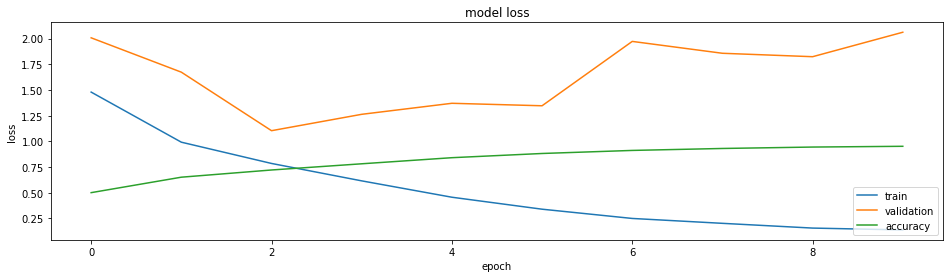

In [156]:
#plot losses
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation', 'accuracy'], loc = 'lower right')
    plt.show()
    
plotloss(history)

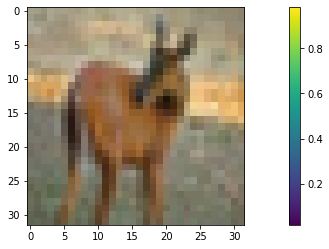

In [157]:
plt.figure()
plt.imshow(X_test[36])
plt.colorbar()

In [158]:
test_score=model.evaluate(X_test, y_test,  batch_size=30)

334/334 [==============================] - 4s 13ms/step - loss: 2.0779 - accuracy: 0.6241


In [ ]:
test_score

[2.2187821865081787, 0.6183000206947327]